In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
print("Null values before cleaning:\n", df.isnull().sum())


Null values before cleaning:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


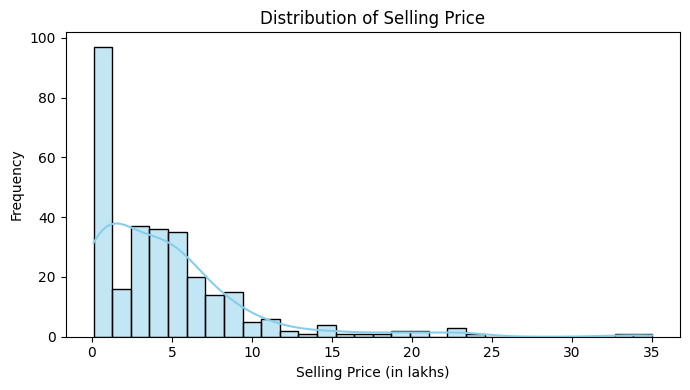

In [5]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Selling_Price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price (in lakhs)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

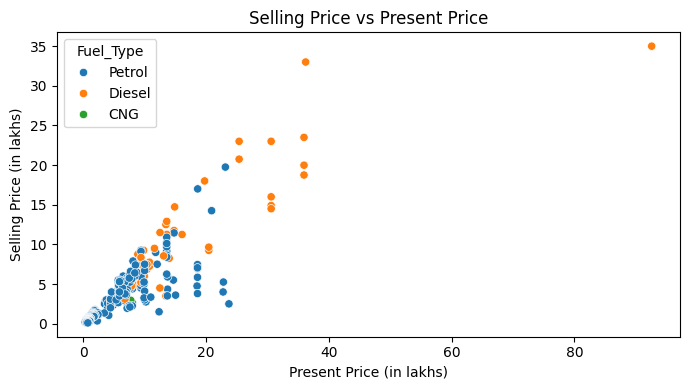

In [6]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type')
plt.title('Selling Price vs Present Price')
plt.xlabel('Present Price (in lakhs)')
plt.ylabel('Selling Price (in lakhs)')
plt.tight_layout()
plt.show()

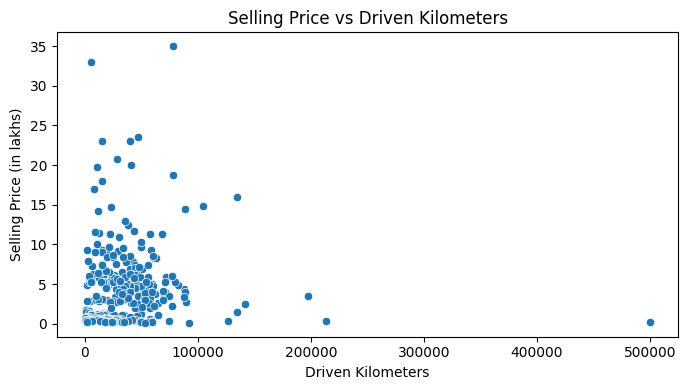

In [7]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Selling Price vs Driven Kilometers')
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price (in lakhs)')
plt.tight_layout()
plt.show()

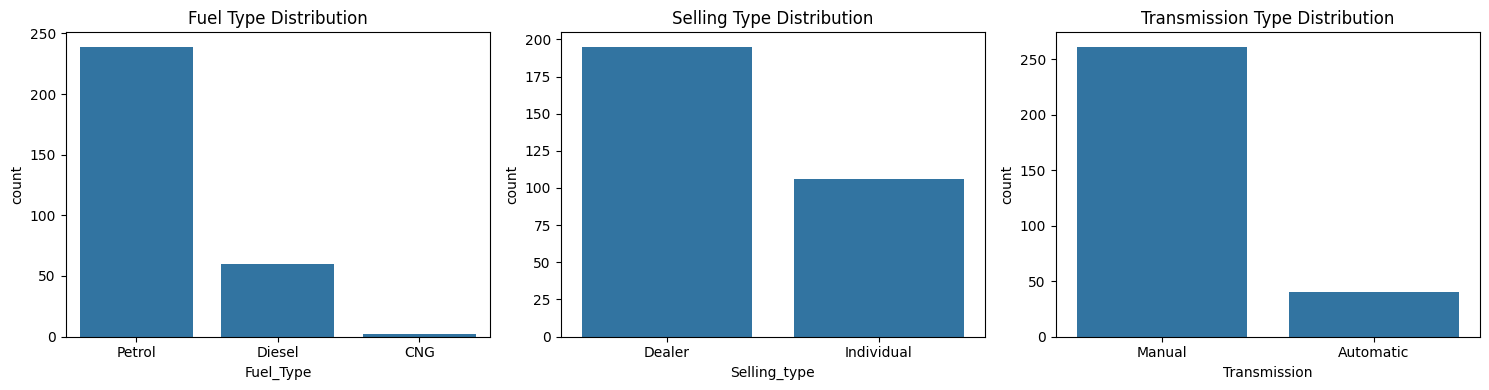

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(x='Fuel_Type', data=df, ax=axs[0])
sns.countplot(x='Selling_type', data=df, ax=axs[1])
sns.countplot(x='Transmission', data=df, ax=axs[2])
axs[0].set_title('Fuel Type Distribution')
axs[1].set_title('Selling Type Distribution')
axs[2].set_title('Transmission Type Distribution')
plt.tight_layout()
plt.show()

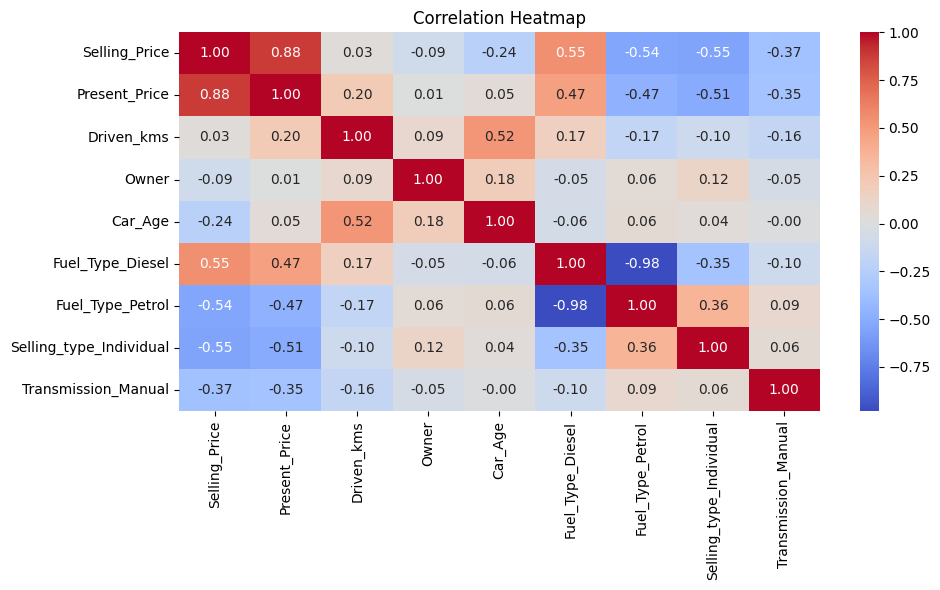

In [10]:
df['Car_Age'] = 2025 - df['Year']
corr_df = df.drop(['Car_Name', 'Year'], axis=1)  
corr_matrix = pd.get_dummies(corr_df, drop_first=True).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [11]:
df['Car_Age'] = 2025 - df['Year']


In [12]:
df = df.drop(['Car_Name', 'Year'], axis=1)

In [13]:
df = pd.get_dummies(df, drop_first=True)

In [14]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [19]:
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: ₹{mae:.2f} lakhs")


R² Score: 0.849
Mean Absolute Error: ₹1.22 lakhs
